In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn.tree import plot_tree

In [21]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [22]:
le = LabelEncoder()

In [23]:
df["company_encoded"] =  le.fit_transform(df.company)

In [24]:
le = LabelEncoder()

In [25]:
df['job_encoded'] =  le.fit_transform(df.job)

In [26]:
le =  LabelEncoder()

In [27]:
df['degree_encoded'] =  le.fit_transform(df.degree)

In [28]:
df

,company,job,degree,salary_more_then_100k,company_encoded,job_encoded,degree_encoded
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [29]:
df.drop(['company','job','degree'] , axis = 1, inplace=True)

In [30]:
df

,salary_more_then_100k,company_encoded,job_encoded,degree_encoded
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [31]:
X = df.drop("salary_more_then_100k",axis= 1)
y =df.salary_more_then_100k

In [32]:
X

,company_encoded,job_encoded,degree_encoded
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [33]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [35]:
df.salary_more_then_100k.value_counts()

salary_more_then_100k
1    10
0     6
Name: count, dtype: int64

In [ ]:
Xtrain,Xtest,ytrain ,ytest = train_test_split(X,y,train_size=.8,stratify=y)

In [37]:
Xtrain

,company_encoded,job_encoded,degree_encoded
2,2,0,0
9,0,0,1
14,1,1,0
6,0,2,1
0,2,2,0
11,1,2,1
1,2,2,1
15,1,1,1
4,2,1,0
3,2,0,1


In [38]:
Xtest

,company_encoded,job_encoded,degree_encoded
7,0,1,0
5,2,1,1
10,1,2,0
13,1,0,1


In [40]:
model= DecisionTreeClassifier()

In [41]:
model.fit (Xtrain,ytrain)

DecisionTreeClassifier()

In [42]:
model.score(Xtrain,ytrain)

1.0

In [43]:
model.score(Xtest,ytest)

1.0

In [44]:
Xtest

,company_encoded,job_encoded,degree_encoded
7,0,1,0
5,2,1,1
10,1,2,0
13,1,0,1


In [48]:
company ={"Abcfarma":0,"Facebook":1,"Google": 2}
job = {"Business Manager": 0 ,"computer Programmer": 1,"Sales exectuive":1}
degree = {"Bachelor":0,"Master":1}

In [49]:
model.predict([[1,1,1]])

c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [50]:
model.predict([[company["Google"],job["Business Manager"],degree["Master"]]])

c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

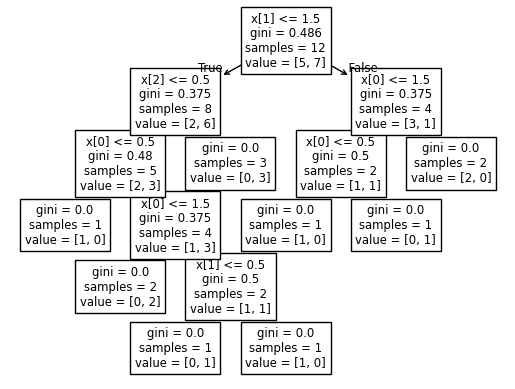

In [53]:
plot_tree(model);

In [54]:
model.feature_importances_

array([0.49714286, 0.4       , 0.10285714])